/Users/biman_giri/.pyenv/versions/3.11.4/envs/BimanDS/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


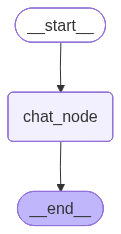

In [1]:
import os
from pyexpat.errors import messages
from unittest.mock import Base
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict, Annotated
from dotenv import load_dotenv
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph.message import add_messages
from IPython.display import Image

load_dotenv()
from langchain_openai import ChatOpenAI

openai_client = ChatOpenAI(
    model="gpt-4o",
    temperature=0.3,
    api_key=os.getenv("OPENAI_API_TOKEN"),
    base_url=os.getenv("OPENAI_API_BASE"),
)


class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]


def chatbot(chat_state: ChatState):
    messages = chat_state["messages"]
    llm_response = openai_client.invoke(messages)
    return {"messages": [llm_response]}


graph = StateGraph(state_schema=ChatState)

graph_check_point = MemorySaver()
graph.add_node("chat_node", chatbot)

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)
chat_graph = graph.compile(checkpointer=graph_check_point)

try:
    display(Image(chat_graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print("Mermaid PNG rendering not supported in this environment.")

In [ ]:
thread_id = 1
while True:
    user_message = input("Type Here: ")
    print("=" * 60)
    print(f"User Message : {user_message}")
    if user_message.strip().lower() in ["exit", "quit", "bye"]:
        break
    intial_state = {"messages": [HumanMessage(content=user_message)]}
    config = {"configurable": {"thread_id": thread_id}}
    result = chat_graph.invoke(intial_state, config=config)
    print("AI Response: ", result["messages"][-1].content)
    print("=" * 60)

User Message : 
AI Response:  Hello! How can I assist you today?
User Message : Hello , my name is Biman
AI Response:  Hello, Biman! How can I assist you today?
User Message : what is my name
AI Response:  Your name is Biman. How can I help you today?
User Message : what is the capital of india
AI Response:  The capital of India is New Delhi.
User Message : My address is west bengal , Paschim mediniput
AI Response:  Thank you for sharing your location. How can I assist you further? If you have any questions or need information, feel free to ask!
User Message : what is my country
AI Response:  Based on the address you provided, West Bengal, Paschim Medinipur, your country is India. If there's anything else you'd like to know, feel free to ask!
User Message : 
AI Response:  Is there anything else you'd like to know or discuss? I'm here to help!
User Message : who is my states chief minister and governor
AI Response:  As of the latest information available, the Chief Minister of West Beng

In [8]:
chat_graph.get_state(config=config).values

{'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='0ce8c60e-1e98-420b-8dcc-cb2867938c41'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 7, 'total_tokens': 16, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-CsNFNrVvdH9A7eEYDeGhF84ArY5O2', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b6de2-563c-7fa1-9319-737e935e5f41-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage

##### Persistance in langgraph refers to the ability to save and restore the state of workflow over time.